<a href="https://colab.research.google.com/github/karthikdoddi103/DL-Assignment-1/blob/main/DL_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GRU**

In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,GRU,Dense
from tensorflow.keras.preprocessing import sequence

In [2]:
max_words = 5000
(xt,yt),(xte,yte)= imdb.load_data(num_words=max_words)

max_len =500
xt=sequence.pad_sequences(xt,maxlen=max_len)
xte=sequence.pad_sequences(xte,maxlen=max_len)

model=Sequential()
model.add(Embedding(max_words,100,input_length=max_len))
model.add(GRU(128))
model.add(Dense(1,activation='sigmoid'))

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
#mse for regression prblm output only 1
#binary cross entropy for binary output only 2
#categorical cross entropy for multiple ourput more than 2
#activation - sigmoid relu tanh
#optimizer - stocasticgd gd adam
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
batch_size=128
epochs=5
model.fit(xt,yt,batch_size=batch_size,epochs=epochs)


Epoch 1/5
196/196 [==============================] - 51s 222ms/step - loss: 0.4516 - accuracy: 0.7731
Epoch 2/5
196/196 [==============================] - 29s 148ms/step - loss: 0.2844 - accuracy: 0.8839
Epoch 3/5
196/196 [==============================] - 21s 110ms/step - loss: 0.2244 - accuracy: 0.9120
Epoch 4/5
196/196 [==============================] - 16s 79ms/step - loss: 0.1756 - accuracy: 0.9350
Epoch 5/5
196/196 [==============================] - 16s 81ms/step - loss: 0.1440 - accuracy: 0.9488


In [4]:
loss,accuracy=model.evaluate(xte,yte,batch_size=batch_size)
print("accuracy:",accuracy)
print("loss:",loss)

196/196 [==============================] - 3s 13ms/step - loss: 0.3189 - accuracy: 0.8834
accuracy: 0.8833600282669067
loss: 0.31892067193984985


In [5]:
history=model.fit(xt,yt,batch_size=batch_size,epochs=epochs)

Epoch 1/5
196/196 [==============================] - 9s 45ms/step - loss: 0.1108 - accuracy: 0.9611
Epoch 2/5
196/196 [==============================] - 10s 52ms/step - loss: 0.0969 - accuracy: 0.9656
Epoch 3/5
196/196 [==============================] - 9s 46ms/step - loss: 0.0733 - accuracy: 0.9747
Epoch 4/5
196/196 [==============================] - 11s 58ms/step - loss: 0.0508 - accuracy: 0.9839
Epoch 5/5
196/196 [==============================] - 8s 40ms/step - loss: 0.0386 - accuracy: 0.9890


In [6]:
train_loss1 = history.history['loss']
train_acc1 = history.history['accuracy']
xc1=range(len(train_acc1))

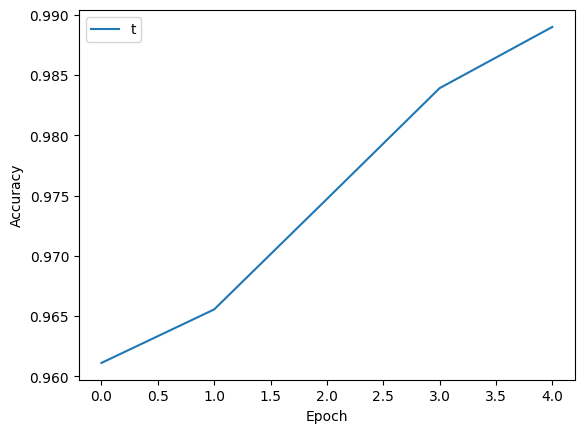

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc1, train_acc1)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend('train')

## LSTM

In [8]:
from tensorflow.keras.layers import Embedding,LSTM,Dense

In [9]:
model = Sequential()
model.add(Embedding(max_words,100, input_length=max_len))
model.add(LSTM(128))
model.add(Dense(units=1, activation='sigmoid'))

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
epochs = 5
batch_size = 128

hist=model.fit(xt, yt, epochs=epochs, batch_size=batch_size)

Epoch 1/5
196/196 [==============================] - 35s 161ms/step - loss: 0.4712 - accuracy: 0.7691
Epoch 2/5
196/196 [==============================] - 20s 102ms/step - loss: 0.4039 - accuracy: 0.8130
Epoch 3/5
196/196 [==============================] - 15s 76ms/step - loss: 0.2761 - accuracy: 0.8871
Epoch 4/5
196/196 [==============================] - 12s 60ms/step - loss: 0.2161 - accuracy: 0.9158
Epoch 5/5
196/196 [==============================] - 11s 56ms/step - loss: 0.1852 - accuracy: 0.9292


In [12]:
loss,accuracy=model.evaluate(xte,yte,batch_size=batch_size)
print("accuracy:",accuracy)
print("loss:",loss)

196/196 [==============================] - 3s 14ms/step - loss: 0.3283 - accuracy: 0.8764
accuracy: 0.8763599991798401
loss: 0.3282637596130371


In [13]:
train_loss2 = hist.history['loss']
train_acc2 = hist.history['accuracy']
xc2=range(len(train_acc2))

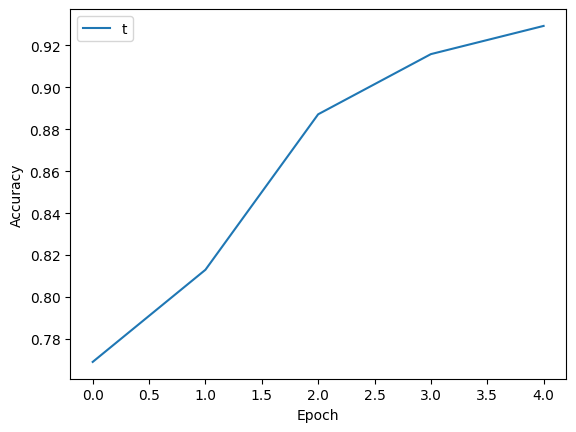

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc2, train_acc2)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend('train')

# RNN

In [15]:
from tensorflow.keras.layers import Embedding,RNN
from keras import layers


In [16]:
model = Sequential()
model.add(Embedding(max_words,100, input_length=max_len))
model.add(layers.LSTM(128))
model.add(layers.Dense(10))
model.add(Dense(units=1, activation='sigmoid'))

In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
epochs = 5
batch_size = 128

h=model.fit(xt, yt, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/5
157/157 [==============================] - 30s 174ms/step - loss: 0.5954 - accuracy: 0.6751 - val_loss: 0.4055 - val_accuracy: 0.8222
Epoch 2/5
157/157 [==============================] - 20s 128ms/step - loss: 0.3101 - accuracy: 0.8711 - val_loss: 0.3147 - val_accuracy: 0.8656
Epoch 3/5
157/157 [==============================] - 14s 87ms/step - loss: 0.2269 - accuracy: 0.9115 - val_loss: 0.2956 - val_accuracy: 0.8816
Epoch 4/5
157/157 [==============================] - 11s 70ms/step - loss: 0.1969 - accuracy: 0.9250 - val_loss: 0.3772 - val_accuracy: 0.8556
Epoch 5/5
157/157 [==============================] - 10s 66ms/step - loss: 0.1578 - accuracy: 0.9405 - val_loss: 0.3393 - val_accuracy: 0.8722


In [19]:
loss,accuracy=model.evaluate(xte,yte,batch_size=batch_size)
print("accuracy:",accuracy)
print("loss:",loss)

196/196 [==============================] - 3s 14ms/step - loss: 0.3602 - accuracy: 0.8717
accuracy: 0.871720016002655
loss: 0.3602287471294403


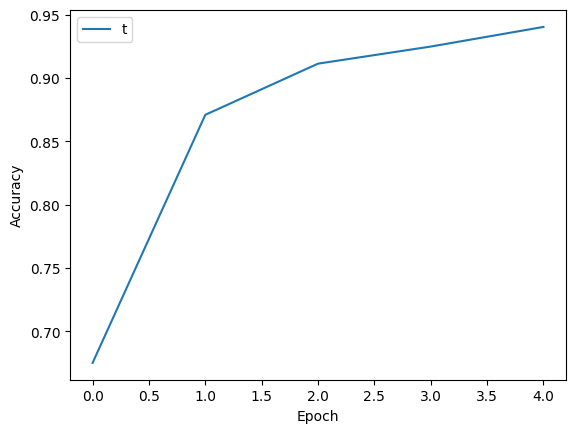

In [20]:
train_loss3 = h.history['loss']
train_acc3 = h.history['accuracy']
xc3=range(len(train_loss3))
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc3, train_acc3)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend('train')

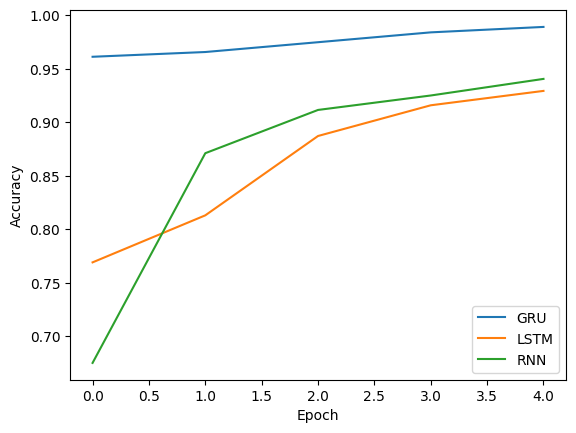

In [21]:
plt.plot(xc1, train_acc1)
plt.plot(xc2, train_acc2)
plt.plot(xc3, train_acc3)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["GRU","LSTM","RNN"])